In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))

set.seed(1)

for (i in 1:nrep){

    n <- dim(GaltonFamilies)[1]

    train <- sample(1:n, n-ntest, replace = FALSE) 
    data(GaltonFamilies)

    n <- dim(GaltonFamilies)[1]

    train <- sample(1:n, n-ntest, replace = FALSE) 
    traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


    new_train<-traindata[0,]
    for (f in unique(traindata$family)){
        fam = subset(traindata, family==f)
        for (g in unique(fam$gender)){
            gen = subset(fam, gender==g)
            df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
            names(df)<-c("family","father","mother","gender","childHeight")
            new_train = rbind(new_train, df)
        }
    }

    traindata <- new_train[,c("father", "mother", "gender")]

    gender_bin <- rep(0, nrow(traindata))
    gender_bin[traindata$gender == 'male'] <- 1
    traindata <- data.frame(traindata, gender_bin)
    traindata <- traindata[,c("father", "mother", "gender_bin")]

    traindata_y <- new_train[,c("childHeight")]
    testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

    gender_bin <- rep(0, nrow(testdata))
    gender_bin[testdata$gender == 'male'] <- 1
    testdata <- data.frame(testdata, gender_bin)
    testdata <- testdata[,c("father", "mother", "gender_bin")]

    testdata_y <- GaltonFamilies[-train,c("childHeight")]

    trainMean <- apply(traindata[,c("father", "mother")],2,mean)
    trainSd <- apply(traindata[,c("father", "mother")],2,sd)

    traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
    testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

    traindata["childHeight"] = traindata_y
    testdata["childHeight"] = testdata_y


    fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

    knn_k = 3
    k <- knn(
        traindata[,c("father", "mother", "gender_bin")], 
        testdata[,c("father", "mother", "gender_bin")], 
        traindata[,"childHeight"], 
        k = knn_k)
    indices = attr(k, "nn.index")
    height_baseline_pred <- c(0,ntest)

    for (j in 1:ntest){
        pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
        pred = predict(fit_baseline,testdata[j,])
        if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-1)){
            alpha = 1
        }
        else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-2)){
            alpha = 0.99
        }
        else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-3)){
            alpha = 0.8
        }
        else{
            alpha = 0.76
        }
        height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
    }

    MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
sum(MSE)/nrep

In [ ]:
install.packages("HistData")
library(HistData)

install.packages("FNN")
library(FNN)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (a in seq(0,1,0.1)){
set.seed(1)
for (i in 1:nrep){

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(traindata))
gender_bin[traindata$gender == 'male'] <- 1
traindata <- data.frame(traindata, gender_bin)
traindata <- traindata[,c("father", "mother", "gender_bin")]

traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(testdata))
gender_bin[testdata$gender == 'male'] <- 1
testdata <- data.frame(testdata, gender_bin)
testdata <- testdata[,c("father", "mother", "gender_bin")]

testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    # alpha = 0.75
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-1)){
        alpha = 1
    }
    else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-2)){
        alpha = 0.99
    }
    else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-3)){
        alpha = 0.8
    }
    else{
        alpha = 0.76
    }
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
flush.console()
# }

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (vknn in 0:15){
for (vknn in seq(0.1,1.9,0.1)){
# for (alpha in seq(0,1,0.05)){
set.seed(1)
for (i in 1:nrep){

data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]
traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]
testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata_n["gender"] = traindata["gender"]
traindata_n["childHeight"] = traindata_y
testdata_n["gender"] = testdata["gender"]
testdata_n["childHeight"] = testdata_y

traindata_1 = subset(traindata_n,gender %in% c("male"))
traindata_0 = subset(traindata_n,gender %in% c("female"))
# traindata_1_n = subset(traindata_1,father <= median(father))
# traindata_1_p = subset(traindata_1,father > median(father))
# traindata_0_n = subset(traindata_0,father <= median(father))
# traindata_0_p = subset(traindata_0,father > median(father))
testdata = testdata_n

fit_baseline_1 <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1)
fit_baseline_0 <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0)
# fit_baseline_1_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_p)
# fit_baseline_1_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_1_n)
# fit_baseline_0_p <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_p)
# fit_baseline_0_n <- lm(childHeight ~ father+mother + I((father*mother)^2), data = traindata_0_n)

knn_k = 10
k_1 <- knn(
    data.frame(traindata_1[,c("father", "mother")]), #, "mother"
    data.frame(testdata[,c("father", "mother")]), 
    traindata_1[,"childHeight"], 
    k = knn_k)
indices_1 = attr(k_1, "nn.index")
k_0 <- knn(
    data.frame(traindata_0[,c("father", "mother")]), #"father", 
    data.frame(testdata[,c("father", "mother")]), 
    traindata_0[,"childHeight"], 
    k = knn_k)
indices_0 = attr(k_0, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    if (testdata[j,]$gender == "male"){
        pred_knn = predict(fit_baseline_1,data.frame(traindata_1[indices_1[j,],]))
        pred_knn = traindata_1[indices_1[j,],]$childHeight
        pred = predict(fit_baseline_1,testdata[j,])
    }
    else{
        pred_knn = predict(fit_baseline_0,data.frame(traindata_0[indices_0[j,],]))
        pred_knn = traindata_0[indices_0[j,],]$childHeight
        pred = predict(fit_baseline_0,testdata[j,])
    }
    # print(pred)
    # alpha = 1/knn_k
    if (var(pred_knn) > vknn){ # 4
        # print(var(pred_knn) )
        alpha = 1
    }
    else{
        alpha = 0
    }
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    # height_baseline_pred[j] <- alpha*pred
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
# print((testdata$childHeight - height_baseline_pred)^2)
}
# print(var(MSE))
print(sum(MSE)/nrep)
# print(alpha)
flush.console()
}

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
# for (alpha in seq(0,1,0.05)){
set.seed(1)
for (i in 1:nrep){

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(traindata))
gender_bin[traindata$gender == 'male'] <- 1
traindata <- data.frame(traindata, gender_bin)
traindata <- traindata[,c("father", "mother", "gender_bin")]

traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(testdata))
gender_bin[testdata$gender == 'male'] <- 1
testdata <- data.frame(testdata, gender_bin)
testdata <- testdata[,c("father", "mother", "gender_bin")]

testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 5
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    # alpha = 0.75
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    if (abs(5*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > 1){
        alpha = 1
    }
    else{
        alpha = 0.8
    }
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
flush.console()
# }

[1] 4.647782


In [ ]:
alpha
[1] 6.061331
[1] 5.885812
[1] 5.721576
[1] 5.568625
[1] 5.426957
[1] 5.296574
[1] 5.177474
[1] 5.069658
[1] 4.973126
[1] 4.887878
[1] 4.813914
[1] 4.751234
[1] 4.699837
[1] 4.659725
[1] 4.630896
[1] 4.613352
[1] 4.607091
[1] 4.612114
[1] 4.628421
[1] 4.656012
[1] 4.694887

knn_k
[1] 7.311537
[1] 6.429766
[1] 6.061331
[1] 6.165545
[1] 6.304998
[1] 6.320913
[1] 6.380022
[1] 6.409725
[1] 6.557248
[1] 6.623162
[1] 6.721667
[1] 6.858195
[1] 7.031937
[1] 7.212236

In [ ]:
nrep <- 100
n <- dim(GaltonFamilies)[1]
ntest <- 200
MSE <- data.frame(matrix(0,nrep,1))
names(MSE) <- c("lm")
# for (knn_k in 1:25){
for (a in seq(0.6,1,0.1)){
set.seed(1)
for (i in 1:nrep){

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
data(GaltonFamilies)

n <- dim(GaltonFamilies)[1]

train <- sample(1:n, n-ntest, replace = FALSE) 
traindata <- GaltonFamilies[train,c("family", "father", "mother", "gender", "childHeight")]


new_train<-traindata[0,]
for (f in unique(traindata$family)){
    fam = subset(traindata, family==f)
    for (g in unique(fam$gender)){
        gen = subset(fam, gender==g)
        df<-data.frame(f, mean(gen$father),mean(gen$mother), g, mean(gen$childHeight))
        names(df)<-c("family","father","mother","gender","childHeight")
        new_train = rbind(new_train, df)
    }
}

traindata <- new_train[,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(traindata))
gender_bin[traindata$gender == 'male'] <- 1
traindata <- data.frame(traindata, gender_bin)
traindata <- traindata[,c("father", "mother", "gender_bin")]

traindata_y <- new_train[,c("childHeight")]
testdata <- GaltonFamilies[-train,c("father", "mother", "gender")]

gender_bin <- rep(0, nrow(testdata))
gender_bin[testdata$gender == 'male'] <- 1
testdata <- data.frame(testdata, gender_bin)
testdata <- testdata[,c("father", "mother", "gender_bin")]

testdata_y <- GaltonFamilies[-train,c("childHeight")]

trainMean <- apply(traindata[,c("father", "mother")],2,mean)
trainSd <- apply(traindata[,c("father", "mother")],2,sd)
# trainMean <- apply(GaltonFamilies[train,c("father", "mother")],2,mean)
# trainSd <- apply(GaltonFamilies[train,c("father", "mother")],2,sd)

traindata_n <- sweep(sweep(traindata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")
testdata_n <- sweep(sweep(testdata[,c("father", "mother")], 2L, trainMean), 2, trainSd, "/")

traindata["childHeight"] = traindata_y
testdata["childHeight"] = testdata_y


fit_baseline <- lm(childHeight ~ . + father*mother, data = traindata)

knn_k = 3
k <- knn(
    traindata[,c("father", "mother", "gender_bin")], 
    testdata[,c("father", "mother", "gender_bin")], 
    traindata[,"childHeight"], 
    k = knn_k)
indices = attr(k, "nn.index")
height_baseline_pred <- c(0,ntest)

for (j in 1:ntest){
    pred_knn = predict(fit_baseline,data.frame(traindata[indices[j,],]))
    pred = predict(fit_baseline,testdata[j,])
    # height_baseline_pred[j] <- mean(pred_knn, pred)
    # alpha = 0.75
    # height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(pred_knn)
    if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-1)){
        alpha = a
    }
    else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-2)){
        alpha = 0.99
    }
    else if (abs(knn_k*testdata[j,]$gender_bin-sum(traindata[indices[j,],]$gender_bin)) > (knn_k-3)){
        alpha = 0.8
    }
    else{
        alpha = 0.76
    }
    height_baseline_pred[j] <- alpha*pred + (1-alpha)*mean(traindata[indices[j,],]$childHeight)
}

MSE[i,1] <- mean((testdata$childHeight - height_baseline_pred)^2)
}
print(sum(MSE)/nrep)
flush.console()
}

[1] 4.591962
[1] 4.589331
[1] 4.587448
[1] 4.586314
[1] 4.585928


In [ ]:
3nn 
1 a 0.8 0.76 (0.9,1)
[1] 4.589112
[1] 4.588426
[1] 4.587823
[1] 4.587303
[1] 4.586866
[1] 4.586513
[1] 4.586242
[1] 4.586054
[1] 4.58595
[1] 4.585928
[1] 4.58599
1 a 0.8 0.76
[1] 4.684644
[1] 4.648304
[1] 4.620269
[1] 4.600538
[1] 4.589112
[1] 4.58599
1 a 0.76 (0.71,0.89)
[1] 4.594076
[1] 4.592372
[1] 4.590869
[1] 4.589568
[1] 4.588468
[1] 4.587569
[1] 4.586872
[1] 4.586377
[1] 4.586082
[1] 4.58599
[1] 4.586098
[1] 4.586408
[1] 4.58692
1 a 0.76
[1] 5.078947
[1] 4.948094
[1] 4.837385
[1] 4.746819
[1] 4.676397
[1] 4.626117
[1] 4.595982
[1] 4.58599
[1] 4.596141
[1] 4.626435

In [ ]:
2nn
-2
[1] 5.392047
[1] 5.193806
[1] 5.024126
[1] 4.883007
[1] 4.77045
[1] 4.686453
[1] 4.631018
[1] 4.604143
[1] 4.60583
[1] 4.636078
[1] 4.694887
-1 [1] 4.630377

4nn
-1 [1] 4.648946
-2 4.636734
-3 4.638435

5nn
-4 [1] 4.645562
-3
[1] 5.933091
[1] 5.632287
[1] 5.370813
[1] 5.148669
[1] 4.965854
[1] 4.822369
[1] 4.718213
[1] 4.653387
[1] 4.627891
[1] 4.641724
[1] 4.694887
-2
[1] 6.228695
[1] 5.868548
[1] 5.55435
[1] 5.286099
[1] 5.063796
[1] 4.887441
[1] 4.757035
[1] 4.672576
[1] 4.634065
[1] 4.641502
[1] 4.694887

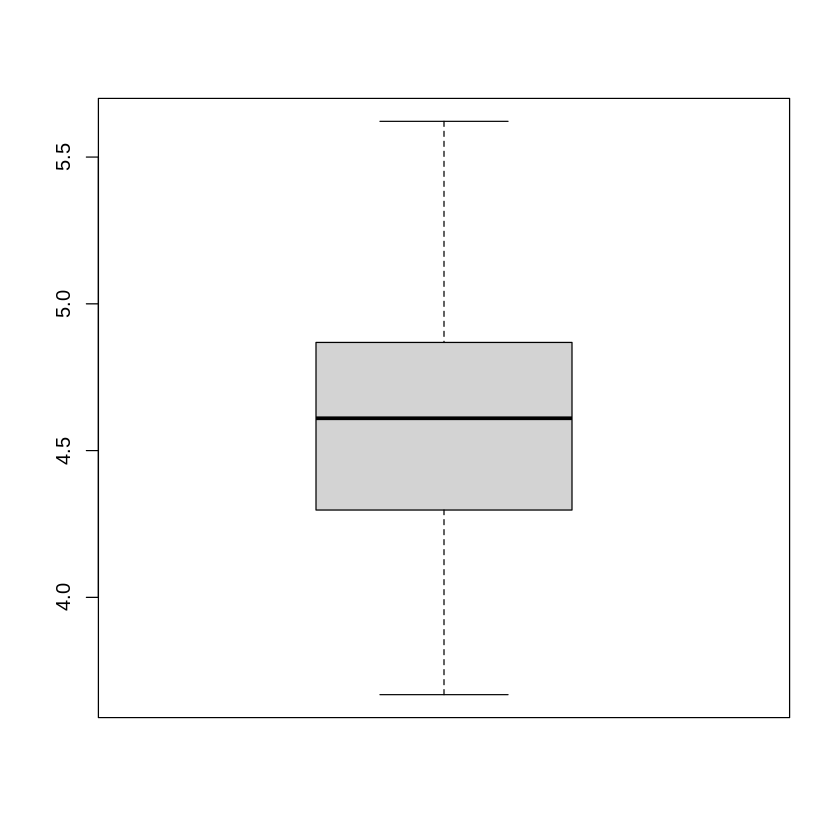

In [ ]:
boxplot(MSE)